In [1]:
library(ggplot2)
library(repr)
options(warn=-1)

In [2]:
# Se carga los data frames formateados con el script python s1-visualizador_alineamiento.py
df_aa = read.csv( "/home/fernando/git/ag/zona_A/aa.csv", stringsAsFactors = F)
df_rna = read.csv( "/home/fernando/git/ag/zona_A/rna.csv", stringsAsFactors = F)
etiquetas <- unique(df_aa$sp)
n <- length(etiquetas)
df_aa$color = as.character(df_aa$color)
df_rna$color = as.character(df_rna$color)

### Grafico flavivirus completo

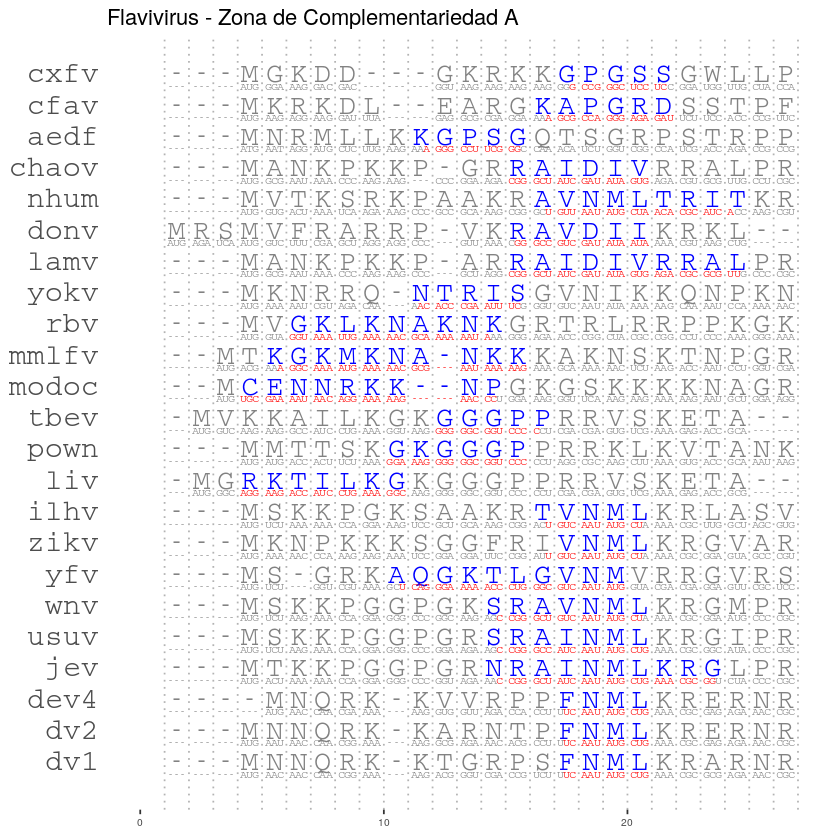

In [3]:
ggplot() +
  geom_text(data=df_aa, aes(x=x + 0.5, y= sp_id, label=seq, color= color), size=rel(6), family="mono") + # grafica secuencia proteina
  geom_text(data=df_rna, aes(x=x, y=sp_id -  0.4 , label=seq, color= color), size=rel(2.5), family="mono") + # grafica secuencia rna
  scale_color_manual( values=c("gray51", "blue", "red")) + # gis para las secuencias que no covarian, azul para cov en prot y rojo en rna
  theme(panel.background=element_rect(fill="white", colour="white"),
        axis.title = element_blank(),
        axis.ticks.y = element_blank(),
        axis.text.y = element_text(family="mono", size=rel(2)),
        axis.text.x = element_text(size=rel(0.7)),
        legend.text = element_text(size=rel(0.7)),
        legend.key.size = unit(0.7, "lines"),
        legend.position = "none") +
  scale_y_continuous(breaks= 1:n, labels = etiquetas) +
  scale_x_continuous(limits = c(-0, 27))+
  geom_vline(data=df_aa,aes(xintercept =x),linetype="dotted",   color = "gray70", size=0.5) + # linea para visualizar mejor las columnas
  ggtitle("Flavivirus - Zona de Complementariedad A")


### por grupos 

In [4]:
# grupos:
mbf <- c("dv1", "dv2", "dv4", "jev", "usuv", "yfv", "wnv", "zikv", "ilhv" )
tbf <- c("liv", "pown", "tbev")
isf <- c("aedf", "cfav", "cxfv")
isfr <- c("lamv", "donv", "nhum", "chaov")
nkvf <- c("modoc", "mmlfv", "rbv")

lista_grupos <- list(mbf, tbf, isf, isfr, nkvf)
names(lista_grupos) <- c("mbf", "tbf", "isf","isfr", "nkvf")

In [5]:
mbf_lim <- c(1, 9)
tbf_lim <- c(9.5, 12)
nkvf_lim <- c(12.5,15)
isfr_lim <- c(16.5, 19)
isf_lim <- c(19.5, 22)

In [6]:
graficar_grupo <- function(limites, size_res = 6, size_rna = 2.5, titulo = "Flavi"){
    ggplot() +
  geom_text(data=df_aa, aes(x=x + 0.5, y= sp_id, label=seq, color= color), size=rel(size_res), family="mono") + # grafica secuencia proteina
  geom_text(data=df_rna, aes(x=x, y=sp_id -  0.4 , label=seq, color= color), size=rel(size_rna), family="mono") + # grafica secuencia rna
  scale_color_manual( values=c("gray51", "blue", "red")) + # gis para las secuencias que no covarian, azul para cov en prot y rojo en rna
  theme(panel.background=element_rect(fill="white", colour="white"),
        axis.title = element_blank(),
        axis.ticks.y = element_blank(),
        axis.text.y = element_text(family="mono", size=rel(2)),
        axis.text.x = element_text(size=rel(0.7)),
        legend.text = element_text(size=rel(0.7)),
        legend.key.size = unit(0.7, "lines"),
        legend.position = "none") +
  scale_y_continuous(breaks= 1:n, labels = etiquetas, limits=c(limites[1], limites[2])) +
  scale_x_continuous(limits = c(-0, 27))+
  geom_vline(data=df_aa,aes(xintercept =x),linetype="dotted",   color = "gray70", size=0.5) + # linea para visualizar mejor las columnas
  ggtitle(paste(titulo, "- Zona de Complementariedad A"))
} 


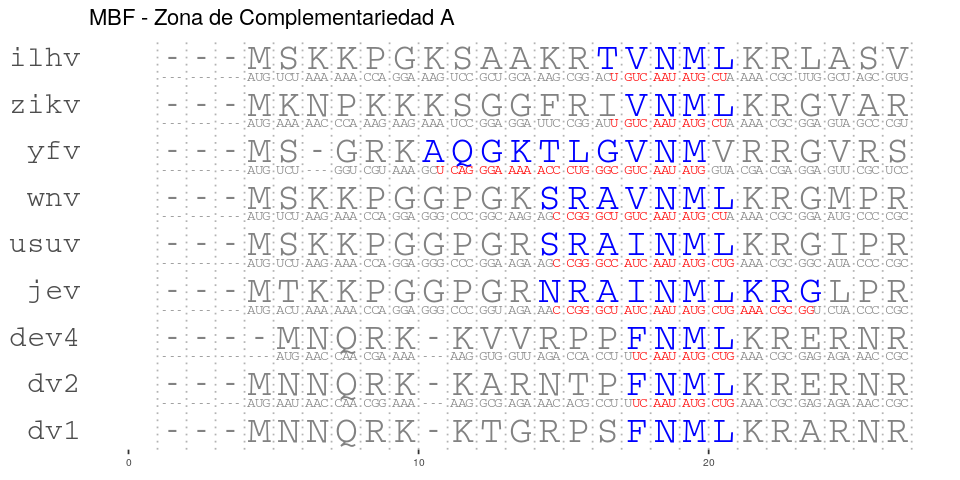

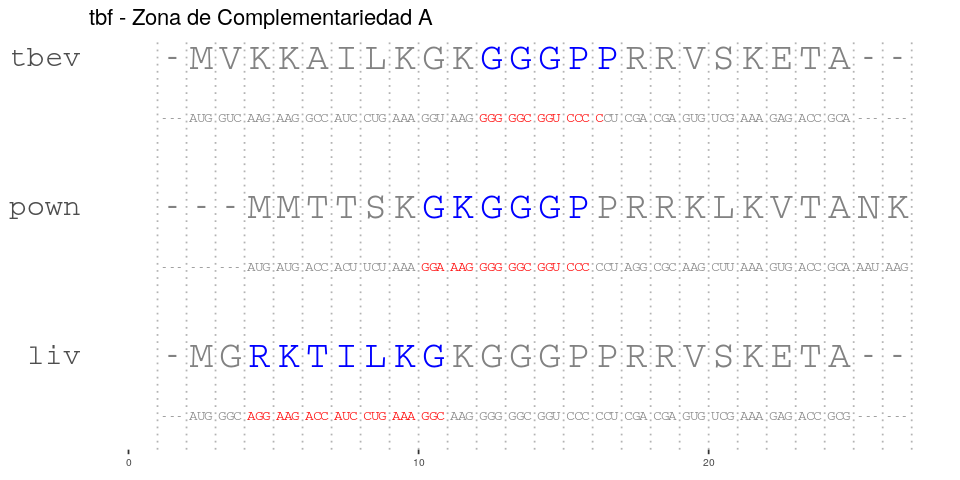

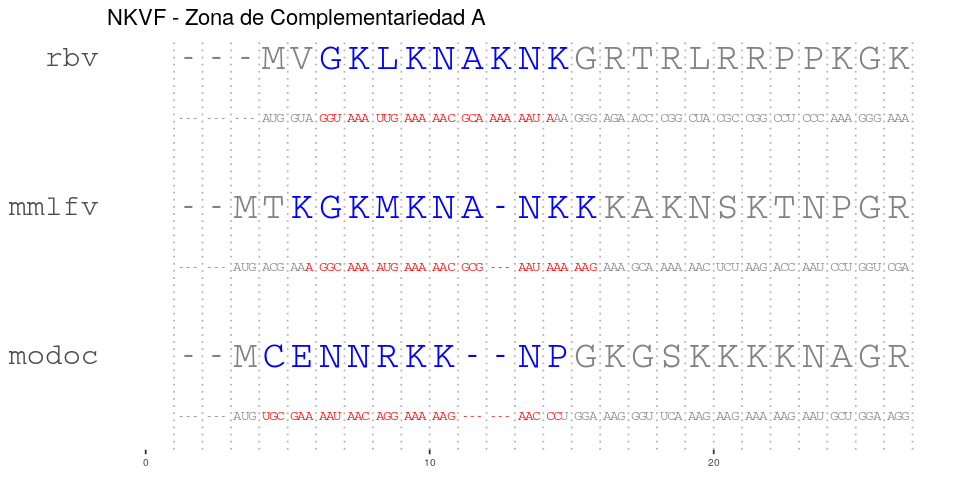

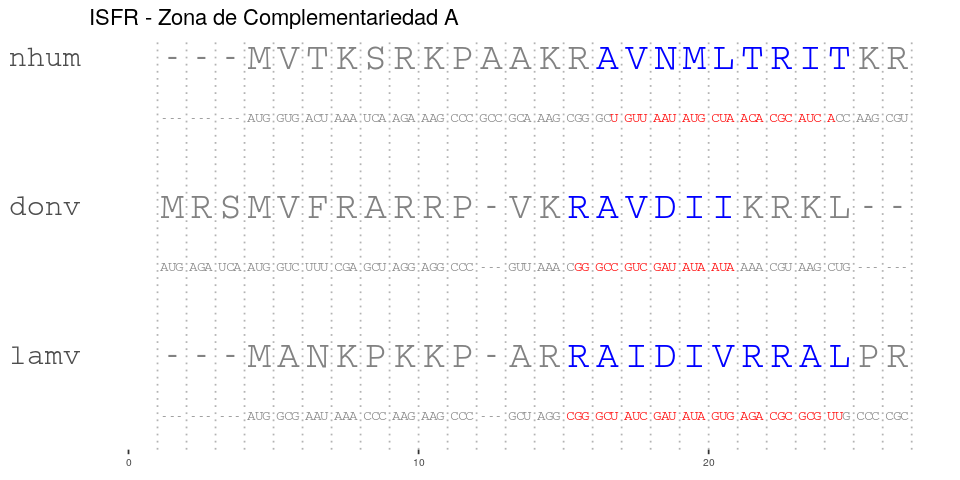

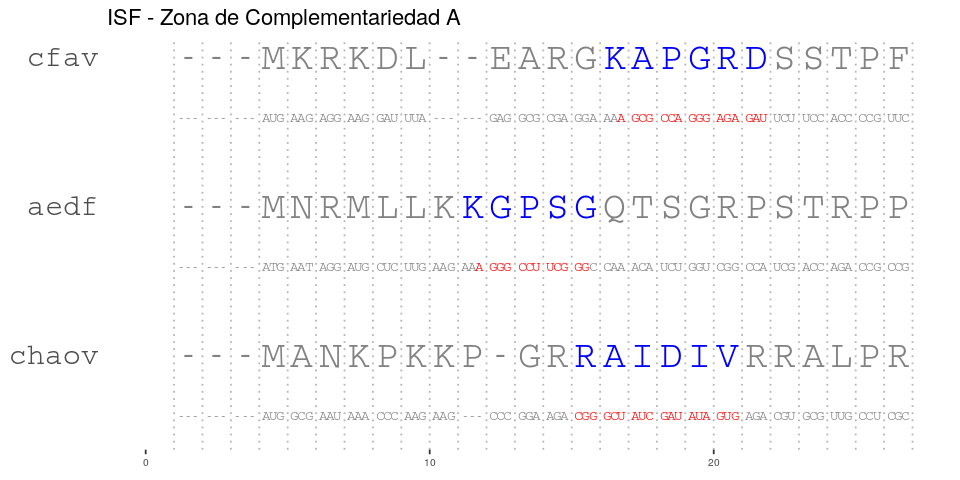

In [7]:
# mbf
options(repr.plot.width=8, repr.plot.height=4)
graficar_grupo(mbf_lim, size_res = 8, size_rna=3, titulo="MBF")

graficar_grupo(tbf_lim , size_res = 8, size_rna=3, titulo="tbf")
graficar_grupo(nkvf_lim , size_res = 8, size_rna=3, titulo="NKVF")
graficar_grupo(isfr_lim , size_res = 8, size_rna=3, titulo="ISFR")
graficar_grupo(isf_lim , size_res = 8, size_rna=3, titulo="ISF") 
